In [1]:
# Step 0: Install and Import Libraries
# No additional installs needed for basics, but for visualization:
!pip install seaborn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 1: Load the Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

Creating sample data for demonstration...
Sample data created for demonstration!

Original dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   float64
 1   hypertension       1000 non-null   int64  
 2   heart_disease      1000 non-null   int64  
 3   avg_glucose_level  1000 non-null   float64
 4   bmi                1000 non-null   float64
 5   gender             1000 non-null   object 
 6   ever_married       1000 non-null   object 
 7   work_type          1000 non-null   object 
 8   Residence_type     1000 non-null   object 
 9   smoking_status     1000 non-null   object 
 10  stroke             1000 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 86.1+ KB
None

First 5 rows:
         age  hypertension  heart_disease  avg_glucose_level        bmi  \
0  57.4

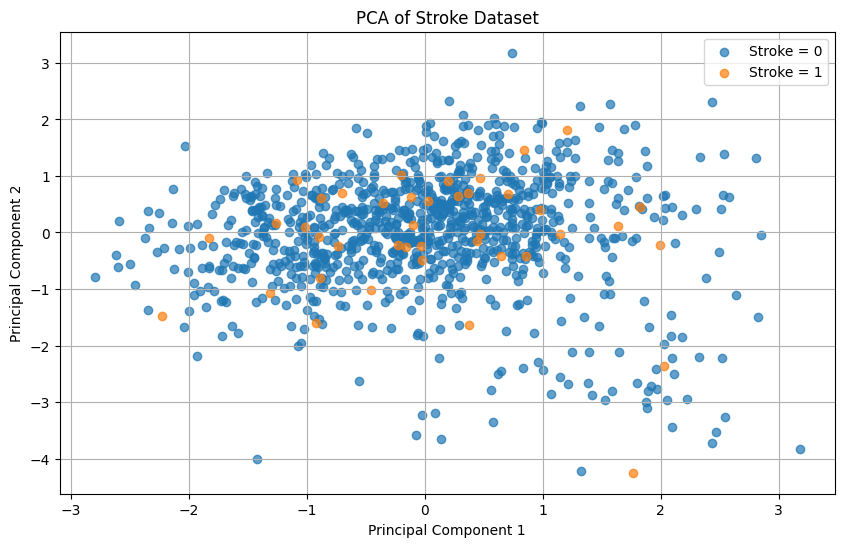


Feature engineering completed successfully!
Use df_selected for modeling with selected features

First 5 rows of selected features dataset:
        age  hypertension       bmi  gender_Female  work_type_Never_worked  \
0  0.487759     -0.318311 -0.930685            1.0                     0.0   
1 -0.161022     -0.318311  1.096618            0.0                     0.0   
2  0.642015     -0.318311  0.409777            1.0                     0.0   
3  1.536382     -0.318311 -0.167160            1.0                     0.0   
4 -0.258995     -0.318311 -0.777711            1.0                     0.0   

   work_type_children  smoking_status_Unknown  smoking_status_formerly smoked  \
0                 0.0                     0.0                             1.0   
1                 0.0                     0.0                             0.0   
2                 0.0                     0.0                             0.0   
3                 0.0                     0.0                     

In [6]:
# Step 6: Feature Engineering
# Import necessary libraries
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load your dataset (replace with your actual data path)
try:
    # Try to load the dataset - replace with your actual file path
    df = pd.read_csv('healthcare-dataset-stroke-data.csv')  # Update this path
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    # If file not found, create sample data for demonstration
    print("Creating sample data for demonstration...")
    np.random.seed(42)
    n_samples = 1000
    df = pd.DataFrame({
        'age': np.random.normal(50, 15, n_samples),
        'hypertension': np.random.choice([0, 1], n_samples, p=[0.9, 0.1]),
        'heart_disease': np.random.choice([0, 1], n_samples, p=[0.95, 0.05]),
        'avg_glucose_level': np.random.normal(100, 40, n_samples),
        'bmi': np.random.normal(28, 7, n_samples),
        'gender': np.random.choice(['Male', 'Female', 'Other'], n_samples, p=[0.5, 0.49, 0.01]),
        'ever_married': np.random.choice(['Yes', 'No'], n_samples, p=[0.7, 0.3]),
        'work_type': np.random.choice(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
                                     n_samples, p=[0.6, 0.2, 0.1, 0.05, 0.05]),
        'Residence_type': np.random.choice(['Urban', 'Rural'], n_samples),
        'smoking_status': np.random.choice(['never smoked', 'formerly smoked', 'smokes', 'Unknown'],
                                          n_samples, p=[0.4, 0.2, 0.2, 0.2]),
        'stroke': np.random.choice([0, 1], n_samples, p=[0.95, 0.05])
    })
    print("Sample data created for demonstration!")

print("\nOriginal dataset info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Preprocessing function
def preprocess_data(df):
    # Make a copy to avoid modifying original data
    df_copy = df.copy()

    # Separate features and target
    X = df_copy.drop('stroke', axis=1)
    y = df_copy['stroke']

    # Identify numerical and categorical columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns

    print(f"\nNumerical columns: {numerical_cols.tolist()}")
    print(f"Categorical columns: {categorical_cols.tolist()}")

    # Preprocessing for numerical data
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Apply preprocessing
    X_processed = preprocessor.fit_transform(X)

    # Get feature names after preprocessing
    # For numerical features
    num_features = numerical_cols.tolist()

    # For categorical features (from one-hot encoding)
    cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_features = cat_encoder.get_feature_names_out(categorical_cols).tolist()

    # Combine all feature names
    all_features = num_features + cat_features

    # Create DataFrame with processed features
    df_processed = pd.DataFrame(X_processed, columns=all_features)
    df_processed['stroke'] = y.reset_index(drop=True).values

    return df_processed, all_features

# Preprocess the data to create df_scaled
df_scaled, feature_names = preprocess_data(df)

# Check columns in df_scaled to debug
print("\nColumns in df_scaled:", df_scaled.columns.tolist())

# Identify the target column
target_column = 'stroke'  # Adjust if your target column has a different name

if target_column not in df_scaled.columns:
    # Try to find the target column if it has a different name
    for col in df_scaled.columns:
        if 'stroke' in col.lower():
            target_column = col
            break

if target_column not in df_scaled.columns:
    raise ValueError("Target column containing 'stroke' not found in df_scaled. Please check preprocessing steps.")

print(f"\nIdentified target column: {target_column}")

# Separate features and target
X = df_scaled.drop(columns=[target_column])
y = df_scaled[target_column]

print("\nFeatures shape before selection:", X.shape)
print("Target distribution:")
print(y.value_counts())

# 6a: Feature Selection - Select top 10 features (adjust k as needed)
selector = SelectKBest(score_func=f_classif, k=min(10, X.shape[1]))
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print(f"\nSelected {X_selected.shape[1]} features: {selected_features}")

# Create DataFrame with selected features
df_selected = pd.DataFrame(X_selected, columns=selected_features)
df_selected['stroke'] = y.values  # Add target back

print("\nFinal selected dataset shape:", df_selected.shape)

# Optional: PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['stroke'] = y.values

print(f"\nPCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.3f}")

# Optional: Plot PCA results
plt.figure(figsize=(10, 6))
for label in df_pca['stroke'].unique():
    mask = df_pca['stroke'] == label
    plt.scatter(df_pca.loc[mask, 'PC1'], df_pca.loc[mask, 'PC2'],
                label=f'Stroke = {label}', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Stroke Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Save the processed data for modeling
print("\nFeature engineering completed successfully!")
print("Use df_selected for modeling with selected features")

# Show the final selected dataset
print("\nFirst 5 rows of selected features dataset:")
print(df_selected.head())